In [1]:
import pandas as pd
import math
import nltk

In [2]:
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

In [3]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer

In [4]:
df = pd.read_csv("MCDONALD3.csv", encoding='latin1')
df.head()

,reviews,rating
0,I love your coffee,5 stars
1,"I did not like the format of the store, the ba...",3 stars
2,Rico and his hot and delicious muffin sausages...,5 stars
3,Bad service and they always forget to put the ...,1 star
4,"I bought two meals from them for my friends, a...",1 star


In [5]:
df['rating_num'] = df['rating'].str.extract('(\d)').astype(int)

def convert_rating_to_label(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

df['label'] = df['rating_num'].apply(convert_rating_to_label)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kashi\AppData\Local\Temp\ipykernel_10964\3833925203.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['rating_num'] = df['rating'].str.extract('(\d)').astype(int)


In [6]:
df.head()

,reviews,rating,rating_num,label
0,I love your coffee,5 stars,5,Positive
1,"I did not like the format of the store, the ba...",3 stars,3,Neutral
2,Rico and his hot and delicious muffin sausages...,5 stars,5,Positive
3,Bad service and they always forget to put the ...,1 star,1,Negative
4,"I bought two meals from them for my friends, a...",1 star,1,Negative


In [7]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered = [i for i in tokens if i not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered]
    return lemmatized

df['tokens'] = df['reviews'].apply(preprocess)

In [8]:
vocab = set()
for tokens in df['tokens']:
   vocab.update(tokens)
vocab = list(vocab)

In [9]:
vocab

['ethical',
 'explained',
 'start',
 'washroom',
 'whatever',
 'yelling',
 'received',
 'district',
 'laptop',
 'issue',
 'flooded',
 'doughy',
 'j',
 'tol',
 'blow',
 'roanoke',
 'caught',
 'okay.have',
 'macdonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s',
 'andi',
 'neat',
 'usally',
 'micky',
 'mcrib',
 'treated',
 'discount',
 'loving',
 'tough',
 'stale',
 'smelly',
 'disregard',
 'cb',
 'false',
 'everytime',
 'notignoring',
 '5th',
 'cutter',
 'salad',
 'lid',
 'mobile',
 'hill',
 'continue',
 'kindly',
 'daughterï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s',
 'arcade',
 'alternative',
 'dropping',
 'rotten',
 'traveling',
 'rehn',
 'ppace',
 'six',
 'rap',
 'company',
 'vacationer',
 'addition',
 'though',
 'floating',
 'tablespoon',
 'bun',
 'shouldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ve',
 'afraid',
 'showed',
 'bummed',
 'another',
 'refill',
 'friendly

In [10]:
def text_to_vector(tokens):
    vec = [0] * len(vocab)
    token_counts = Counter(tokens)
    for idx, word in enumerate(vocab):
        vec[idx] = token_counts[word]
    return vec

df['vector'] = df['tokens'].apply(text_to_vector)

In [11]:
train_df = df.sample(frac=0.8, random_state=42).reset_index(drop=True)
test_df = df.drop(train_df.index).reset_index(drop=True)

In [12]:
pd.set_option("display.max_colwidth", None)

In [13]:
df.head()

,reviews,rating,rating_num,label,tokens,vector
0,I love your coffee,5 stars,5,Positive,"[love, coffee]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,"I did not like the format of the store, the bathroom is kept closed.",3 stars,3,Neutral,"[like, format, store, ,, bathroom, kept, closed, .]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,Rico and his hot and delicious muffin sausages as always the only thing they don't put napkins or ketchup or spicy sauce,5 stars,5,Positive,"[rico, hot, delicious, muffin, sausage, always, thing, n't, put, napkin, ketchup, spicy, sauce]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,"Bad service and they always forget to put the complete order, there is always something missing even meat in the hamburger",1 star,1,Negative,"[bad, service, always, forget, put, complete, order, ,, always, something, missing, even, meat, hamburger]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,"I bought two meals from them for my friends, and they gave me bread and cheese in exchange for meat. Hahahaha, and the account came out with 30 dollars. Damn the mother of fraud",1 star,1,Negative,"[bought, two, meal, friend, ,, gave, bread, cheese, exchange, meat, ., hahahaha, ,, account, came, 30, dollar, ., damn, mother, fraud]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"


## NAIVE BAYES

In [41]:
class_counts = Counter(train_df['label'])
total_docs = len(df)
priors = {label: count / total_docs for label, count in class_counts.items()}


word_counts = {label: Counter() for label in class_counts}
for i, row in train_df.iterrows():
    word_counts[row['label']].update(row['tokens'])


total_words_per_class = {label: sum(words.values()) for label, words in word_counts.items()}


vocab = set()
for words in word_counts.values():
    vocab.update(words.keys())
vocab = list(vocab)
vocab_size = len(vocab)


def predict_naive_bayes(tokens):
    scores = {}
    for label in class_counts:
        log_prob = math.log(priors[label])  
        for word in tokens:
            word_freq = word_counts[label][word]
            prob = (word_freq + 1) / (total_words_per_class[label] + vocab_size)
            log_prob += math.log(prob)
        scores[label] = log_prob
    return max(scores, key=scores.get)


test_df['nb_predicted'] = test_df['tokens'].apply(predict_naive_bayes)


accuracy = (test_df['nb_predicted'] == test_df['label']).mean()
print(f"\nNaive Bayes Accuracy (Based on PDF Logic): {round(accuracy * 100, 2)}%")


Naive Bayes Accuracy (Based on PDF Logic): 78.6%


In [15]:
def cosine_distance(v1, v2):
    dot_product = sum(a * b for a, b in zip(v1, v2))
    norm1 = math.sqrt(sum(a * a for a in v1))
    norm2 = math.sqrt(sum(b * b for b in v2))
    if norm1 == 0 or norm2 == 0:
        return 1 
    return 1 - (dot_product / (norm1 * norm2))

In [16]:

def predict_sentiment_knn_test(vector, k=3):
    distances = []
    for i in train_df.index:
        dist = cosine_distance(vector, train_df.loc[i, 'vector'])
        distances.append((dist, train_df.loc[i, 'label']))
    neighbors = sorted(distances, key=lambda x: x[0])[:k]
    labels = [label for _, label in neighbors]
    most_common = Counter(labels).most_common(1)[0][0]
    return most_common


test_df['knn_predicted'] = test_df['vector'].apply(lambda vec: predict_sentiment_knn_test(vec, k=3))


knn_accuracy = (test_df['knn_predicted'] == test_df['label']).mean()
print(f"\nKNN Accuracy on Test Set: {round(knn_accuracy * 100, 2)}%")



KNN Accuracy on Test Set: 78.91%


In [17]:
user_input = input("\nEnter a customer review: ")


user_tokens = preprocess(user_input)


def vectorize_user_input(tokens):
    vec = [0] * len(vocab)
    token_counts = Counter(tokens)
    for idx, word in enumerate(vocab):
        vec[idx] = token_counts[word]
    return vec

user_vector = vectorize_user_input(user_tokens)


nb_result = predict_naive_bayes(user_tokens)


def predict_knn_for_input(vector, k=3):
    distances = []
    for i in df.index:
        dist = cosine_distance(vector, df.loc[i, 'vector'])
        distances.append((dist, df.loc[i, 'label']))
    neighbors = sorted(distances, key=lambda x: x[0])[:k]
    labels = [label for _, label in neighbors]
    most_common = Counter(labels).most_common(1)[0][0]
    return most_common

knn_result = predict_knn_for_input(user_vector)


print("\n--- Sentiment Predictions ---")
print(f"Naive Bayes Prediction: {nb_result}")
print(f"KNN Prediction (k=3): {knn_result}")


Enter a customer review:  The service is horrible at this location



--- Sentiment Predictions ---
Naive Bayes Prediction: Negative
KNN Prediction (k=3): Negative


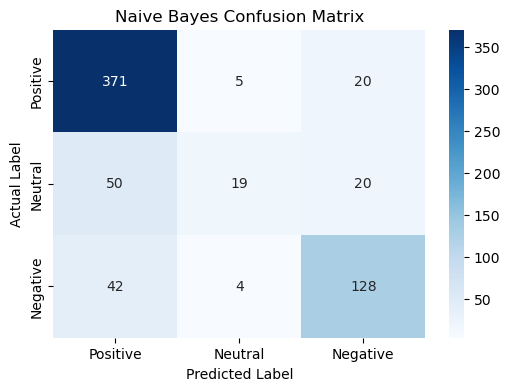

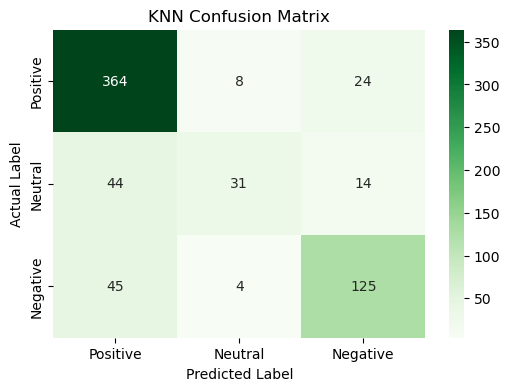

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes Confusion Matrix & Heatmap
nb_cm = confusion_matrix(test_df['label'], test_df['nb_predicted'], labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6,4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# KNN Confusion Matrix & Heatmap
knn_cm = confusion_matrix(test_df['label'], test_df['knn_predicted'], labels=['Positive', 'Neutral', 'Negative'])

plt.figure(figsize=(6,4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
